In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../Boxcox_data.csv")#.drop(columns = ['Unnamed: 19']).dropna(axis = 0)

In [3]:
df.head(10)

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,1,79,160,60.0,13.40,1,1.102850,1.294467,86,0,0,0.735387,3.292473,1.890708,1.953510,4.419284,-0.586581,1.164018,0
1,1,81,153,38.0,16.20,0,1.101960,1.291369,69,0,0,0.804830,3.013113,1.981166,1.329596,4.095725,-0.130053,1.068070,0
2,1,85,157,40.0,16.23,1,1.104184,1.298820,89,0,0,0.785011,2.677968,1.691904,1.985677,4.794901,-0.062392,0.948329,0
3,1,78,155,40.0,16.65,0,1.101362,1.291369,58,0,0,0.813855,2.899949,1.798217,1.721837,4.403593,0.553171,0.854635,1
4,0,43,166,46.0,16.70,1,1.102331,1.296316,77,0,0,0.791237,3.280768,2.506392,1.147280,4.184021,0.883070,1.092206,0
5,0,68,158,43.0,17.20,0,1.101960,1.293480,56,0,0,0.753101,4.247519,2.527207,2.363685,5.189230,0.260470,1.139784,0
6,0,76,170,50.0,17.30,1,1.103480,1.298820,70,0,0,0.756863,2.733137,1.905486,2.057191,4.860655,0.874659,1.088332,0
7,1,77,157,43.0,17.40,1,1.102509,1.292449,63,0,0,0.767666,2.859253,1.660748,1.559542,4.164567,0.076171,1.023375,1
8,1,79,160,45.0,17.58,0,1.101767,1.290236,66,0,0,0.831992,3.082133,2.068855,1.817774,4.300997,1.089746,1.016369,0
9,1,83,160,45.0,17.60,1,1.103480,1.298820,66,0,0,0.778568,3.023263,1.981166,1.801773,4.713130,1.169447,0.992080,0


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'SBP',
       'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr', 'TG',
       'TC', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
count,682.00000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.63783,66.412023,162.781525,63.495968,23.859106,0.653959,1.102509,1.295649,67.900293,0.027859,0.021994,0.792528,3.038853,2.037777,1.744184,4.335582,0.279352,1.048619,0.260997
std,0.48098,10.061282,7.156777,9.653883,2.902418,0.476056,0.001313,0.003996,9.212870,0.164690,0.146772,0.029865,0.362882,0.216211,0.335435,0.320170,0.518135,0.092750,0.439501
min,0.00000,17.000000,145.000000,38.000000,13.400000,0.000000,1.097993,1.283635,20.000000,0.000000,0.000000,0.568868,0.336754,1.213737,-0.558254,1.796557,-1.332969,0.548925,0.000000
25%,0.00000,62.000000,158.000000,58.000000,22.000000,0.000000,1.101767,1.293480,62.000000,0.000000,0.000000,0.775393,2.841302,1.905486,1.581783,4.158663,-0.062392,0.996451,0.000000
50%,1.00000,67.500000,162.000000,63.000000,23.700000,1.000000,1.102331,1.295411,68.000000,0.000000,0.000000,0.790828,3.018201,2.036717,1.745696,4.313070,0.274533,1.058646,0.000000
75%,1.00000,72.000000,168.000000,70.000000,25.600000,1.000000,1.103480,1.298820,73.000000,0.000000,0.000000,0.805501,3.206516,2.179927,1.918745,4.488358,0.615647,1.109315,1.000000
max,1.00000,91.000000,185.000000,110.000000,34.700000,1.000000,1.105871,1.311202,106.000000,1.000000,1.000000,0.895969,5.218831,2.940577,4.340149,6.949575,1.767554,1.708253,1.000000


In [6]:
#data = df.drop(columns = ['Unnamed: 19']).astype('float').values
data =df.values

In [7]:
data.shape

(682, 19)

In [8]:
from sklearn import metrics as skmetric
skmetric.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [9]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']

scorer = 'f1_macro'

In [10]:
X.shape

(682, 18)

In [11]:
X

array([[ 1.00000000e+00,  7.90000000e+01,  1.60000000e+02, ...,
         4.41928377e+00, -5.86581121e-01,  1.16401790e+00],
       [ 1.00000000e+00,  8.10000000e+01,  1.53000000e+02, ...,
         4.09572527e+00, -1.30052670e-01,  1.06806953e+00],
       [ 1.00000000e+00,  8.50000000e+01,  1.57000000e+02, ...,
         4.79490135e+00, -6.23922823e-02,  9.48328894e-01],
       ...,
       [ 0.00000000e+00,  6.20000000e+01,  1.65000000e+02, ...,
         5.05074406e+00,  7.25129613e-01,  9.99687598e-01],
       [ 1.00000000e+00,  7.10000000e+01,  1.57000000e+02, ...,
         4.41772470e+00, -1.06865060e-01,  1.02730296e+00],
       [ 0.00000000e+00,  6.80000000e+01,  1.78000000e+02, ...,
         4.12051737e+00,  8.66128719e-01,  1.00500359e+00]])

In [12]:
Y.shape

(682,)

In [13]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
score = cross_val_score(classifier_lr, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8, scoring=scorer)
print(score)
print(sum(score)/len(score))


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[0.41525424 0.45217391 0.41025641 0.41525424 0.43131868 0.51382114
 0.48120301 0.41025641 0.425      0.4       ]
0.435453803518143


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [14]:
#n_estimators为森林中树木数量，max_depth树的最大深度
#进行交叉验证，训练集和测试集为7:3的比例进行分配，
#ShuffleSplit()函数用于随机抽样（数据集总数，迭代次数，test所占比例）
#{'bootstrap': True, 'max_depth': 17, 'max_features': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
#classifier_rf = RandomForestClassifier(n_estimators=45, max_depth= 21, max_features= 7, min_samples_split= 2, min_samples_leaf=2, bootstrap=True)
classifier_rf = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)
score = cross_val_score(classifier_rf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring=scorer)
print(score)
print(sum(score)/len(score))

[0.78660436 0.86452634 0.77280265 0.83534818 0.82928349 0.82875
 0.82938979 0.84351799 0.77399321 0.78483724]
0.8149053241103523


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
#{'max_depth': 19, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 60}
classifier_gbdt = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
#classifier_gbdt = GradientBoostingClassifier(n_estimators=40, max_depth= 4, max_features= 3, min_samples_leaf=1, min_samples_split=2)
score = cross_val_score(classifier_gbdt, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring=scorer)
print(score)
print(sum(score)/len(score))

[0.84183791 0.77069385 0.84351799 0.81360544 0.84340104 0.84873022
 0.82455391 0.82455391 0.75535714 0.7882223 ]
0.8154473727801029


In [16]:
from sklearn.svm import SVC
classifier_svc = SVC(C= 1, gamma=1, kernel = 'linear')

score = cross_val_score(classifier_svc, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring=scorer)
print(score)
print(sum(score)/len(score))

[0.41452991 0.4338843  0.41702128 0.41949153 0.43153527 0.42677824
 0.41702128 0.42436975 0.44758065 0.43621399]
0.42684261878831586


In [25]:
from xgboost import XGBClassifier
from xgboost import plot_importance

#rf = XGBClassifier(learning_rate=0.01,
#                      n_estimators=10,           # 树的个数-10棵树建立xgboost
#                      max_depth=4,               # 树的深度
#                      min_child_weight = 1,      # 叶子节点最小权重
#                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
#                      subsample=1,               # 所有样本建立决策树
#                      colsample_btree=1,         # 所有特征建立决策树
#                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
#                      random_state=27,           # 随机数
#                      slient = 0)

classifier_xgb = XGBClassifier(n_estimators=70, max_depth= 6, min_child_weight=1, learning_rate= 0.01)
#rf = XGBClassifier(learning_rate= 0.01, max_depth= 7,  n_estimators= 25)

score = cross_val_score(classifier_xgb, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring=scorer)
print(score)
print(sum(score)/len(score))

[0.79153987 0.824795   0.83044554 0.78660436 0.84110825 0.86749319
 0.80839161 0.73098267 0.76487414 0.81548822]
0.8061722844537057


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

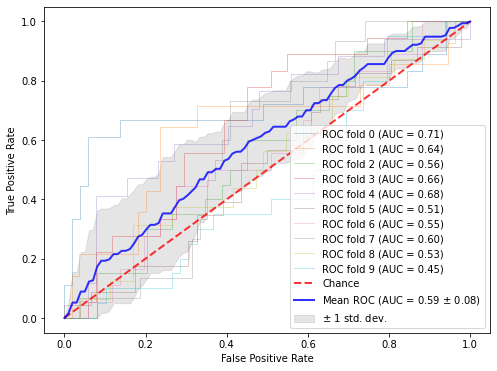

In [18]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = classifier_lr

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

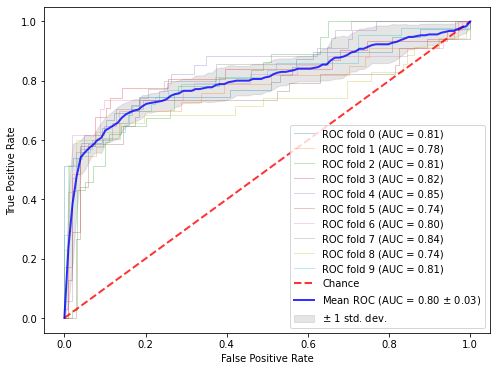

In [19]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = classifier_svc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

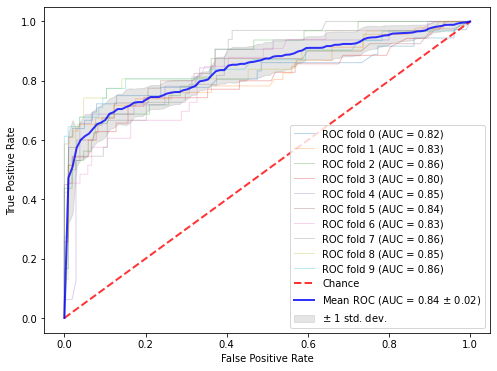

In [20]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
#classifier = classifier_rf
classifier = RandomForestClassifier(n_estimators=45, max_depth= 21, max_features= 7, min_samples_split= 2, min_samples_leaf=2, bootstrap=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

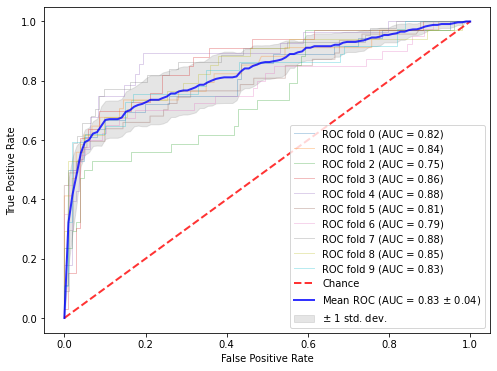

In [21]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = classifier_gbdt
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

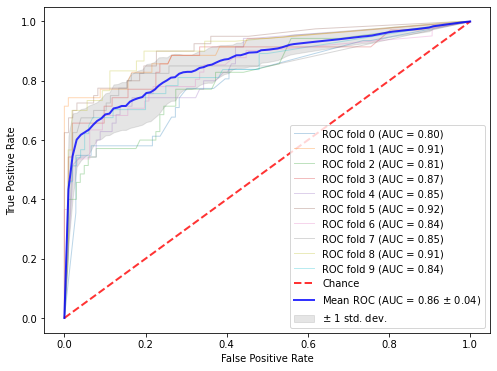

In [26]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = classifier_xgb
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()